## Gantt chart

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [5]:
def gantt_data(path, var, pos):
    """ 
    Returns a dataframe with data availability info.
  
    Parameters: 
        path (str): file name
        var (str): selected variable
        pos (int): position in the graph (from bottom to top)
    """
    df = pd.read_csv(path)
    df = df.set_index('DATE_TIME')
    df.index = pd.to_datetime(df.index)
    df['avail'] = df[var].isnull()  # look for null values
    df['avail'] = df['avail'].map({False: pos})  # poputlate with 
    return df

In [9]:
df_1 = gantt_data('data/CRDS_IAG_G2301_hour_LT.txt', 'CO2_m', 3)
df_2 = gantt_data('data/CRDS_IAG_G2201-i_hour_LT.txt', '12CO2_m', 2)

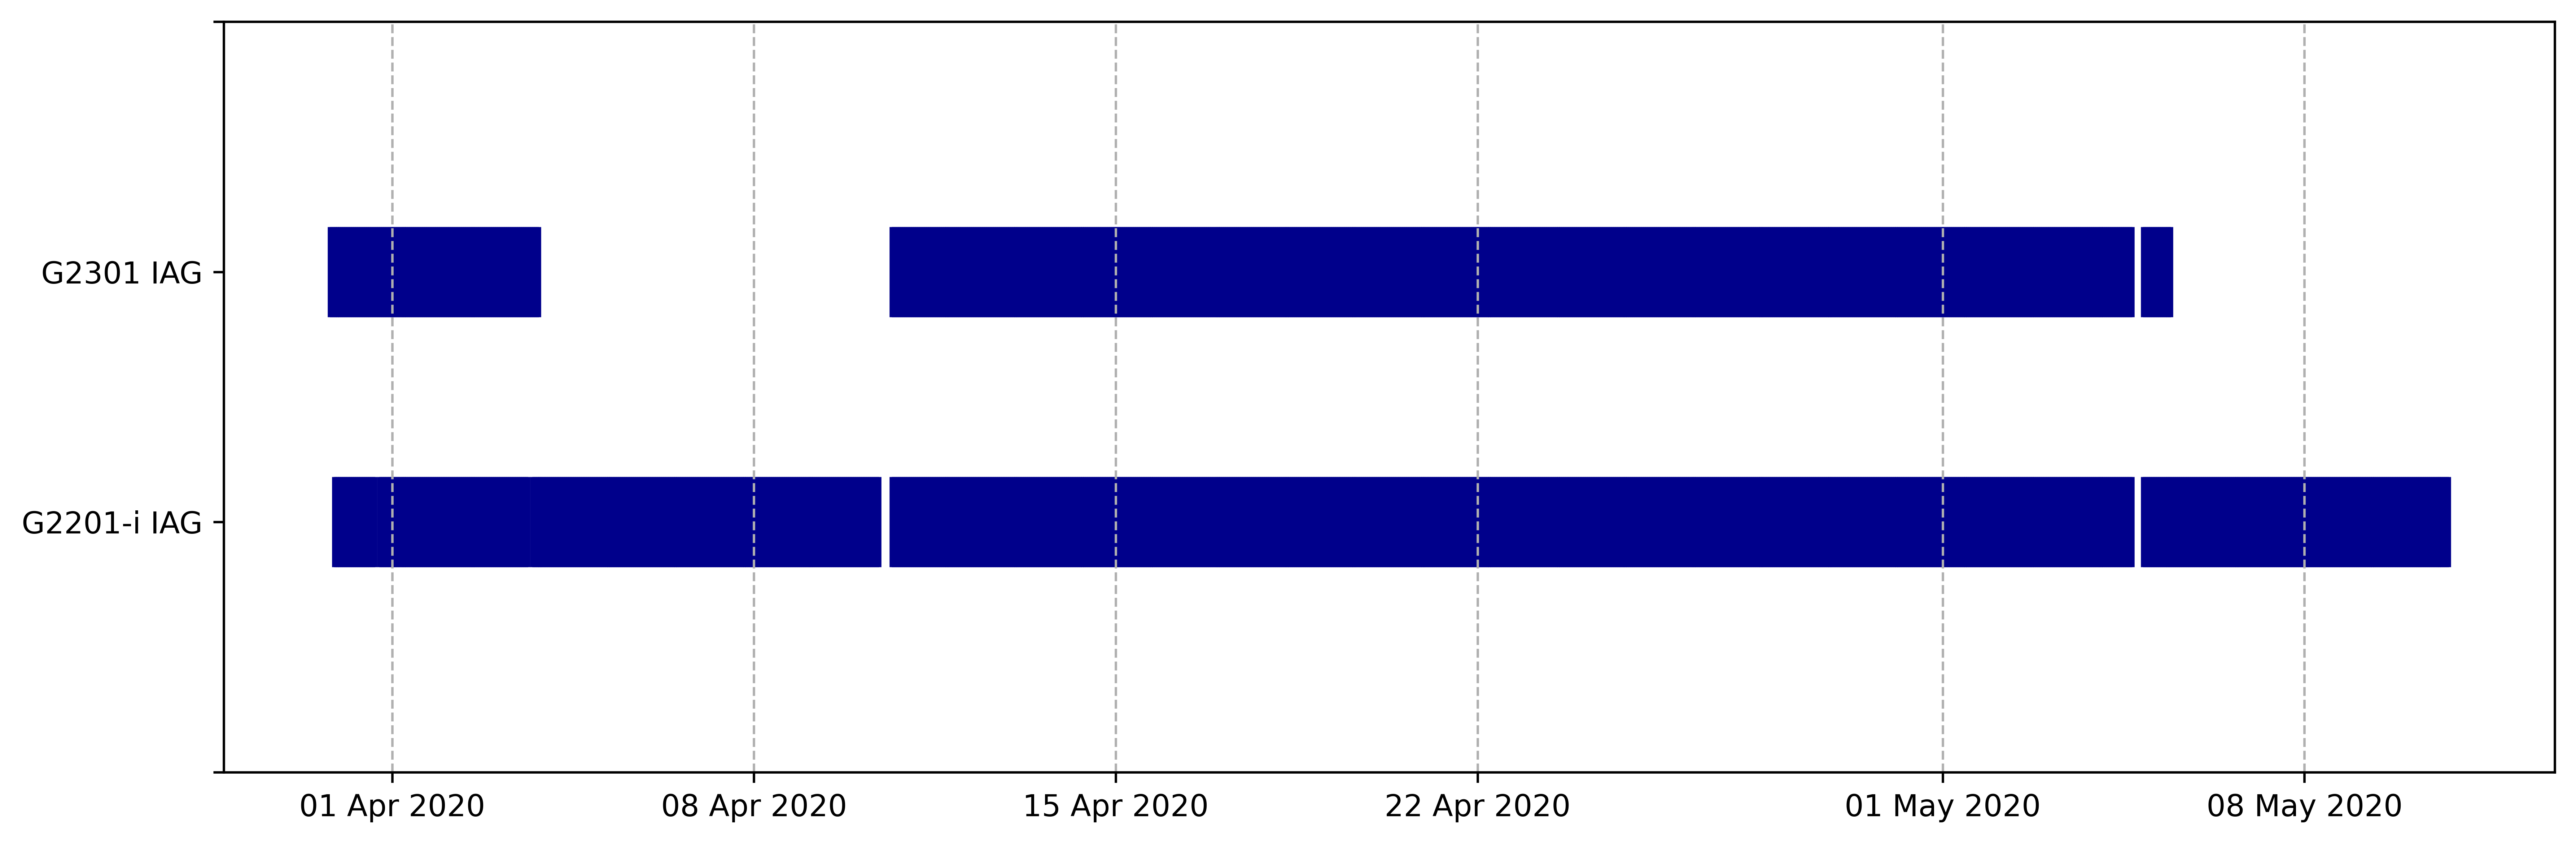

In [14]:
plt.rcParams["figure.dpi"] = 600
fig, ax = plt.subplots(figsize=(12, 4))

plt.scatter(df_1.index,df_1.avail, s=30**2, marker="|", color="darkblue")
plt.scatter(df_2.index,df_2.avail, s=30**2, marker="|", color="darkblue")

ax.grid(which='major', axis='x', linestyle='--')
y = [1, 2, 3, 4]
plt.yticks(y, ['', 'G2201-i IAG', 'G2301 IAG', ''])
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d %b %Y'))
plt.tight_layout()